In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from pycocotools.coco import COCO
import numpy as np
import matplotlib.pyplot as plt
import pylab
import os
import json
import numpy as np
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
val_images = 'model_data/instances_val2017_person.json'
img_path = "/home/public/datasets/coco/val2017"

In [5]:
# initialize COCO api for instance annotations
coco=COCO(val_images)

# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))


catIds = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds(catIds=catIds );

loading annotations into memory...
Done (t=0.38s)
creating index...
index created!
COCO categories: 
person

COCO supercategories: 
person


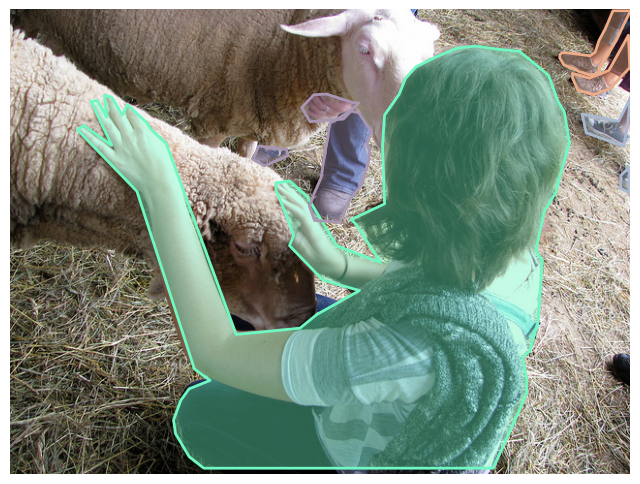

In [9]:
for imgId in imgIds[:2]:
    # Load the image 
    imgIds = coco.getImgIds(imgIds = [imgId])
    img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
    I = cv2.imread(os.path.join(img_path,img['file_name']))
    # Change I to RGB
    I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
    plt.imshow(I); plt.axis('off')
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    coco.showAnns(anns)
    plt.show()